# Task2: Predict optimum number of clusters from given 'Iris' dataset
In this task, the optimal number of clusters have to be found from the popular 'iris' dataset. The clusters will have to be represented visually.

## Author: Neelam

### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the dataset 

In [2]:
#Importing the dataset
iris = datasets.load_iris()
features = [name[:-5].replace(' ', '_') for name in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns = features)
species = [iris.target_names[num] for num in iris.target]
species = np.where(iris.target==0, iris.target_names[0],
          np.where(iris.target==1, iris.target_names[1], iris.target_names[2]))
iris_df['species'] = species
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_df['species']=le.fit_transform(iris_df['species'])
iris_df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

### Petal length(cm) Vs Petal width(cm)

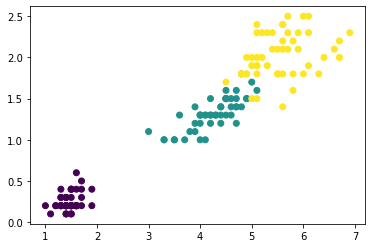

In [8]:
plt.scatter(iris_df['petal_length'],iris_df['petal_width'],c=iris_df['species'])

In [9]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

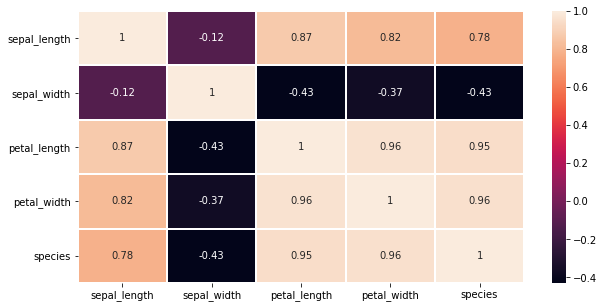

In [10]:
#correlation matrix
fig=plt.figure(figsize=(10,5))
sns.heatmap(iris_df.corr(),linewidths=1,annot=True)

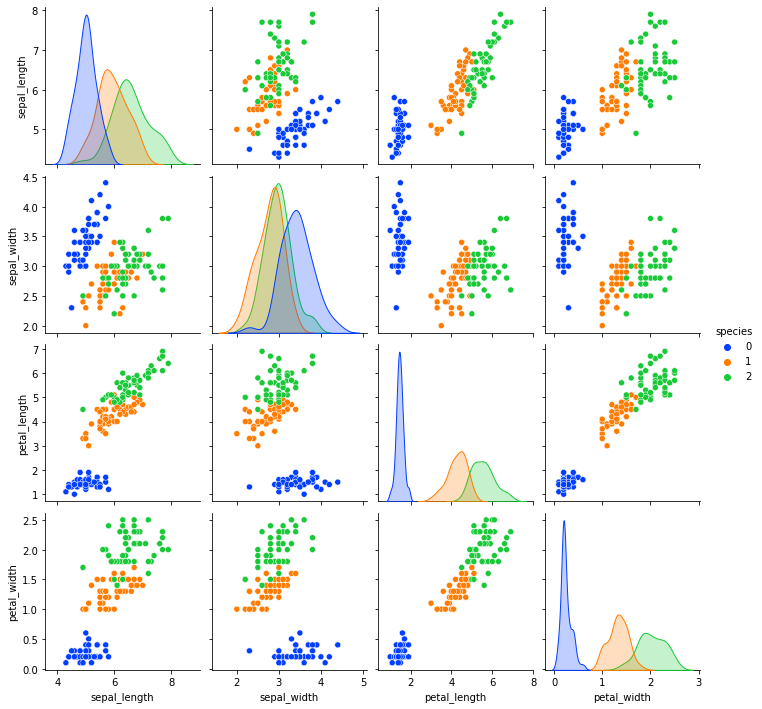

In [11]:
#Plotting the pair plot
sns.pairplot(iris_df,hue="species",palette="bright")

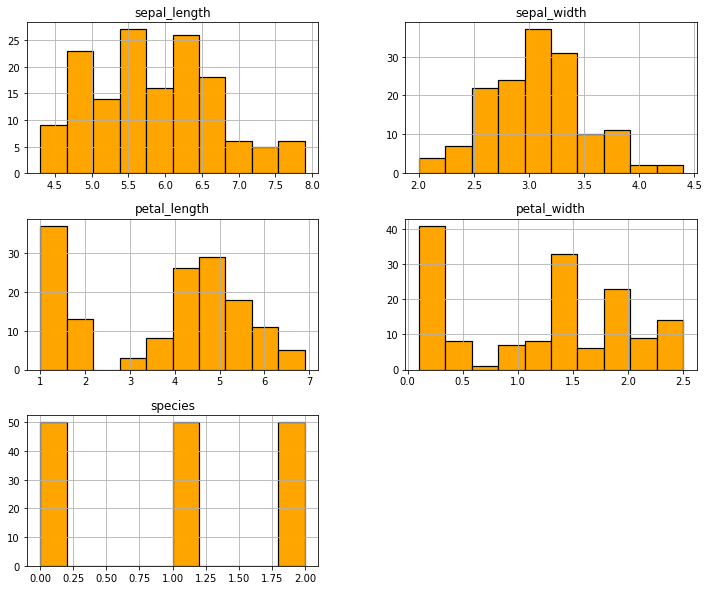

In [12]:
iris_df.hist(edgecolor='black', linewidth=1.2, color='orange')
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_width'>

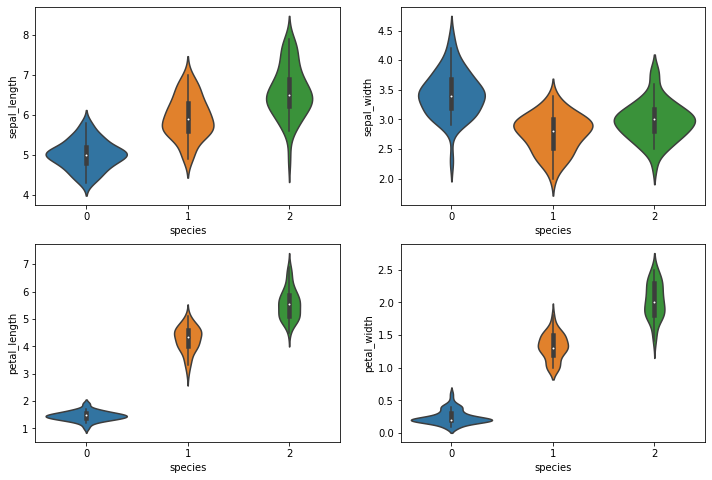

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal_length', data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal_width', data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal_length', data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal_width', data=iris_df)

### Elbow Method using within-cluster-sum-of-squares(wcss)

In [14]:
from sklearn.cluster import KMeans
features = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris_df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[781.3705999999996,
 179.05358288770054,
 87.22062785114048,
 66.88965140650853,
 50.33009126984127,
 42.941013724198534,
 35.50263153513155,
 31.364459439111616,
 29.35679944637519,
 26.873433129513515]

### Using Elbow graph to find optimum no. of Clusters

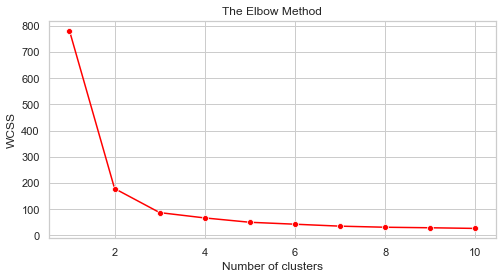

In [15]:
plt.figure(figsize=(8,4))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. 
#### We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

### Initialization using K-means++

In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualizing the clusters

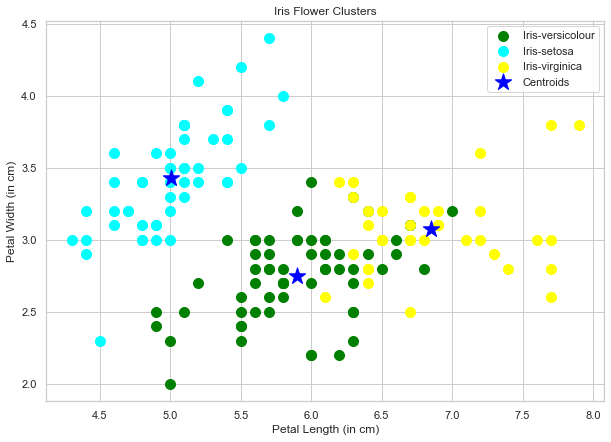

In [17]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 2, 0], features [y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'blue',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width (in cm)')
plt.xlabel('Petal Length (in cm)')
plt.legend()